In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Heart_disease_dataset.csv")
print(df.shape)

(4238, 16)


In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Missing Values

In [5]:

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
#Missing values in education column.
df["education"].fillna(df["education"].mode().iloc[0],inplace=True)
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [28]:
#missing values in cigsperday column if not currentsmoker fill it with average else 0. 

b=df["cigsPerDay"].mean()
def fun(a):
    smok=a[0]
    cigs=a[1]
    if pd.isnull(cigs):
        if(smok==0):
            return 0
        else:
            return b
    else:
        return cigs
            
df["cigsPerDay"]=df[["currentSmoker","cigsPerDay"]].apply(fun,axis=1)
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [30]:
#Filling missing values of BPMeds with mode.
df["BPMeds"].fillna(df["BPMeds"].mode()[0],inplace=True)
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [31]:
#Filling remaining columns missing values with their mean.

df["totChol"].fillna(df["totChol"].mean(),inplace=True)
df["BMI"].fillna(df["BMI"].mean(),inplace=True)
df["heartRate"].fillna(df["heartRate"].mean(),inplace=True)
df["glucose"].fillna(df["glucose"].mean(),inplace=True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Data Analysis

In [32]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:xlabel='male', ylabel='count'>

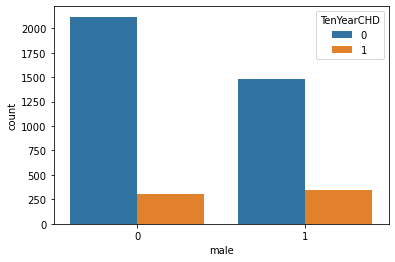

In [33]:
sn.countplot("male",hue="TenYearCHD",data=df)

<AxesSubplot:xlabel='male', ylabel='age'>

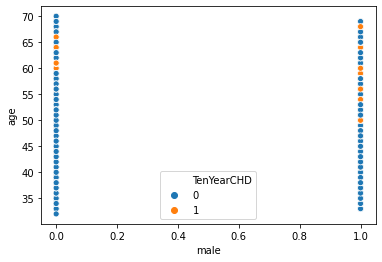

In [35]:
sn.scatterplot(x="male",y="age",hue="TenYearCHD",data=df)

In [45]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

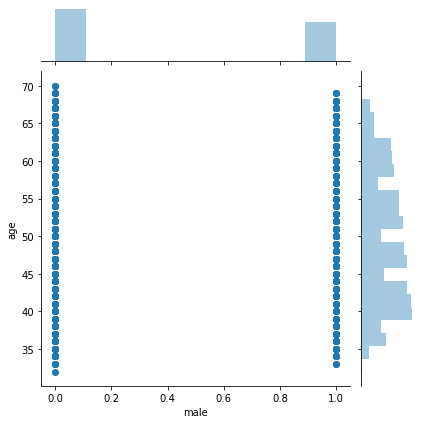

In [53]:
sn.jointplot(x="male",y="age",data=df)
plt.show()

In [54]:
X=df.drop("TenYearCHD",axis=1)
Y=df["TenYearCHD"]

## Train Test and Split and Normalize

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=4)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train.shape

(2966, 15)

## GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
gd=GridSearchCV(LogisticRegression(),grid_values,verbose=1,cv=10,n_jobs=-1)
gd.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [70]:
gd.best_score_

0.8526628901628902

In [71]:
gd.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
gd.best_params_

{'C': 0.1, 'penalty': 'l2'}

## Training the Model

In [73]:
logi=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logi.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Metrics and Accuracy Evaluation

In [74]:
from sklearn.metrics import f1_score,confusion_matrix,log_loss,jaccard_score,accuracy_score,classification_report
#predicting the test data
y_pred=logi.predict(X_test)
y_prob=logi.predict_proba(X_test)

print("Accuracy_score : ",accuracy_score(y_test,y_pred))
print("f1_score : ",f1_score(y_test,y_pred,average="weighted"))
print("jaccard_score : ",jaccard_score(y_test,y_pred))
print("log_loss : ",log_loss(y_test,y_prob))

Accuracy_score :  0.8553459119496856
f1_score :  0.8014959888263712
jaccard_score :  0.061224489795918366
log_loss :  0.3777630070650859


In [75]:
#Confusion Matrix and Classification Report

print("Confusion_Matrix : ",confusion_matrix(y_test,y_pred))
print("Classification_Report : ")
print(classification_report(y_test,y_pred))

Confusion_Matrix :  [[1076    7]
 [ 177   12]]
Classification_Report : 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1083
           1       0.63      0.06      0.12       189

    accuracy                           0.86      1272
   macro avg       0.75      0.53      0.52      1272
weighted avg       0.82      0.86      0.80      1272

